# Hackathon 1, statistics.

This project illustrates the statistics part of the course LEPL1109. In the first part of the project, you will study the China water pollution by analyzing a dataset providing the water pollution levels collected from various monitoring stations across 10 major provinces in China throughout the year 2023. In the second part of the project, you will analyze a dataset containing high-frequency time-series  data collected from an industrial boiler operating in a chemical plant.

## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

•	Do not comment your results directly into cells of code. Use instead a Markdown cell. 

•	"Dry" code or results not followed by a minimum of analysis / comments will be penalized.


## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Lepoutre Florian - 45122300

Part. 2: Peffer Jean-Louis - 72232300

Part. 3: Schlicker Ulrick - 41982300

Part. 4: Jamblin Otto - 36402301

Part. 5: Thiry John - 45942300

Part. 6: Gangolf Pierre - 40492300

# China Water Pollution 

This dataset provides  water pollution levels collected from various monitoring stations across 10 major provinces in China throughout the year 2023. The data  includes  parameters such as pH, turbidity, chemical and biological oxygen demand, nutrient levels, and heavy metal concentrations. These indicators are widely used by environmental monitoring agencies to assess water quality for ecological, human, and industrial impacts.

We will focus on the Water Quality Index. 

## 1. Basic statistics

1.a) Load the dataset 'china_water_pollution_data_hack.csv'. Convert Province, City  to categorical variables. (**0.5 pt**) 

In [1]:
#code here
import pandas as pd
import numpy as np
data = pd.read_csv('./China_water_pollution/china_water_pollution_data_hack.csv')


# Convertir en variables catégorielles
data['Province'] = data['Province'].astype('category')
data['City'] = data['City'].astype('category')


In [2]:
# we have a dataframe, we convert it in an array and just
datn = data.values
n  = datn.shape[0] #nombre de villes
print(n)


water_quality_index = data['Water_Quality_Index'].values  # pour éviter les NaN

# Calculs statistiques manuels
print("Moyenne :", np.mean(water_quality_index))
print("Variance :", np.var(water_quality_index))
print("Médiane :", np.median(water_quality_index))
print("1er quartile (25%) :", np.quantile(water_quality_index, 0.25))
print("3e quartile (75%) :", np.quantile(water_quality_index, 0.75))


3000
Moyenne : 57.56112230000001
Variance : 30.532331360309655
Médiane : 57.52858333333334
1er quartile (25%) : 53.74819791666667
3e quartile (75%) : 61.66666666666666


1.b) Calculate the mean, variance, median, 25% and 75% quantiles of the water quality index (which ranges from 0 to 100) for all cities in the dataset. Comment your results! (**1.5 pts**)

In [3]:
#code here




Comment here:

## 2. Hypothesis tests 

2.a) Check with a Student's T test that the average water quality index is the same in Shenzhen and Dali: $$H_0: \mu_{Shenzhen} = \mu_{Dali},$$ 
$$H_1: \mu_{Shenzhen} \neq \mu_{Dali}.$$ Calculate all statistics and p-value without recourse to other functions than statistical distributions (use course's formula). Use a confidence level of 5%. Take care to comment your conclusions. Are all assumptions required to perform this test sastisfied? Which additional test do you have to do to validate your result? (**2.5 pts**)

In [ ]:
#code here
import scipy.stats as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#lecture des données 
data = pd.read_csv('./China_water_pollution/china_water_pollution_data_hack.csv')
Shenzhen_data = data[data["City"] == "Shenzhen"]["Water_Quality_Index"]
Dali_data = data[data["City"] == "Dali"]["Water_Quality_Index"]
# nombre de données pour la ville de Shenzhen
n1 = len(Shenzhen_data)
print("n1 "+str(n1))
# nombre de données pour la ville de Dali
n2 = len(Dali_data)
print("n2 "+str(n2))
# degré de liberté
df=n1+n2-2
print("df "+str(df))
# moyenne des donnés pour la ville de Shenzhen     ----------à verif si on peut utiliser mean ou aps --------------
X1bar=np.mean(Shenzhen_data)
print("X1bar "+str(X1bar))
# moyenne des donnés pour la ville de Dali     ----------à verif si on peut utiliser mean ou aps --------------
X2bar=np.mean(Dali_data)
print("X2bar "+str(X2bar))
# calul des variances empiriques
sum=0
for x1 in Shenzhen_data:
    sum=sum+(x1-X1bar)**2
S1=np.sqrt((1/(n1-1))*sum)
print("S1^2 " + str(S1**2))
sum=0
for x2 in Dali_data:
    sum=sum+(x2-X2bar)**2
S2=np.sqrt((1/(n2-1))*sum)
print("S2^2 "+str(S2**2))

Spool = np.sqrt(((n1-1)*(S1**2)+(n2-1)*(S2**2))/(df))

T=((X1bar-X2bar)/(Spool*np.sqrt((1/n1)+(1/n2))))
print("T " + str(T))
# calcul de la p-valeur
pvalue= 2*(1-sc.t.cdf(T,df,loc=0,scale=1))
#verif facon de faire prof  pval = 2*sc.t.cdf(-np.abs(Tx),df=n+n-2)
print(pvalue)

n1 155
n2 144
df 297
X1bar 58.98471827956989
X2bar 54.18112893518518
S1^2 27.43282236014349
S2^2 31.26603095676373
T 7.670141879325692
2.4750497845413337e-13


Comment here:

2.b) 'Wuhan', 'Luoyang', 'Chengdu', 'Nanjing', 'Dali' seems to have similar (and low) water quality index. Test the assumption: $$H_0:  \mu_{Wuhan} = \mu_{Luoyang}= \mu_{Chengdu} = \mu_{Nanjing} =\mu_{Dali}.$$
**Hint**: reformulate the problem as a linear regression.

(**2 pts**)

In [5]:
#code here
import scipy.stats as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./China_water_pollution/china_water_pollution_data_hack.csv')
Wuhan_data = data[data["City"] == "Wuhan"]["Water_Quality_Index"]
Luoyang_data = data[data["City"] == "Luoyang"]["Water_Quality_Index"]
Chengdu_data = data[data["City"] == "Chengdu"]["Water_Quality_Index"]
Nanjing_data = data[data["City"] == "Nanjing"]["Water_Quality_Index"]
Dali_data = data[data["City"] == "Dali"]["Water_Quality_Index"]

Comment here: 

## 3. Regressions

3.a) Propose a regression model which explains the Water_Quality_Index as a function of other explanatory variables, **for the city of Shanghai**. Split your data set into a training set (80% of the data) that you use for fitting the model and a test set (20% of the data) on which you test the accuracy of the model. 

* Use the OLS() function of the package statsmodels.api to perform the linear regression. 
* Comment your results (goodness of fit, R2, F-stat and T-stats of coefficients)
* Identify potential non-relevant covariates
* Calculate the MAE on the test and training sets. 

(**3 pts**)

In [6]:
#code here 


Comment here: 

3.b) Same question as 3.a) but now you use a Gaussian process regression. Use a RBF and Matern kernel and compare MAEs of the 2 models. Which one is the best? (**2 pts**)

In [7]:
#code here


Comment here: 

# Boiler

![furnace_plotL](boiler/furnace_plotL.PNG)

This dataset contains high-frequency time-series  data collected (every 5 seconds) from an industrial boiler operating in a chemical plant. The boiler is equipped with multiple sensors capturing parameters such as pressure, temperature, flow rate, and oxygen levels. The dataset reflects a real-world industrial scenario. The boiler outlet steam temperature, ranging typically from 530 °C to 545 °C during stable operation, is used as the key indicator of equipment state. Deviations outside this range represent abnormal operating conditions. 

## 4. Poisson Process

4. During stable operations, the outlet steam temperature is in the interval 530 °C to 545 °C. 

a) Load the dataset 'data_boiler.csv', plot the Boiler outlet steam temperature (variable 'TE_8332A.AV_0') and count the number of times this temperature is outside this normal range. What do you observe? (**1 pt**)

In [8]:
#code here


Comment here: 

b) A Poisson process, denoted by $N_t$ is a counting process. The number of events observed during an interval [0,t] is distributed according to a Poisson law with a parameter $\lambda \times t$. Using the method of moment, estimate $\lambda \times t$, the frequency of overheating **or** underheating (i.e. when we are outside the interval) per hour.

Remark: do not forget that time-series data are collected every 5 seconds.

(**1.5 pt**)

In [9]:
#code here
print("Hello World")

Hello World


c) Calculate the probability of observing more ( >= ) than 50 abnormal temperatures on 1h. (**1 pt**)

In [10]:
#code here


Comment here: 

## 5. Fit of distributions and forecasting 

5. The induced draft fan motor current must in normal condition stay below 30 Amp. A current above 30 Amp may cause damage to the installation. 

a) Fit a Gamma and an exponentiated Weibull distributions to the variable YFJ3_AI.AV_0. Compare histograms and  densities, and choose the most appropriate distribution. Using the most appropriate distribution, determine the probability that over a similar period of time, we observe a peak of induced draft fan motor current above 30 Amp. 
(**3 pts**)

alpha =52.624051775157966
loc =15.629113736275116
beta =0.1349122251329703
exp =18.01768005409685
k =3.187632729221556
loc =15.629113736275116
lam =6.262483575734004


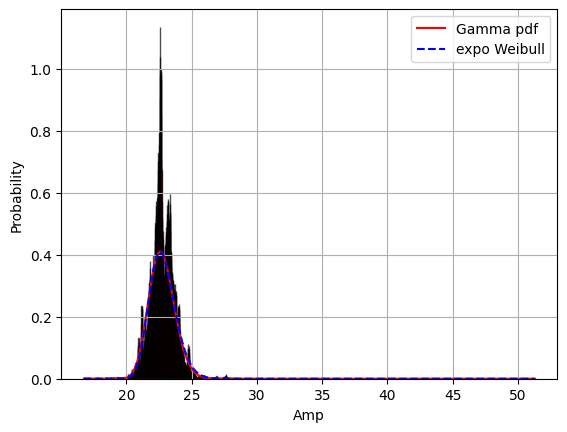

loi de vraisemblance gamma-119739.70951714725
loi de vraisemblance expo Weibull-119762.99944072591
On choisit la distribution Gamma
La probabilité d'avoir un pic au dessus de 30Amp est de 2.651745711901299e-09


In [11]:
#code here
import scipy.stats as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("./Boiler/data_boiler.csv")
variable = data['YFJ3_AI.AV_0#'] 

n, bins, patches = plt.hist(variable, bins=4000, density=True, color='red', edgecolor='black', alpha=0.7)
plt.xlabel('Amp')
plt.ylabel('Probability')
plt.grid(True)

# permet de trouver les paramètres pour que la fonction gamma fit le plus possible aux données
alpha , loc, beta = sc.gamma.fit(variable)
print("alpha =" +  str(alpha))
print("loc ="+ str(loc))
print("beta ="+ str(beta))

# code permettant de tracer la fonction gamma qu'on a trouvé
x =  np.linspace(variable.min(), variable.max(), 300)
G=sc.gamma.pdf(x,loc=loc,a=alpha,scale=beta)
plt.plot(x, G,'r-', label='Gamma pdf')

# permet de trouver les paramètres pour que la fonction exponentielle Weibull fit le plus possible aux données
(exp , k , locexpo, lam)= sc.exponweib.fit(variable)
print("exp =" +  str(exp))
print("k ="+ str(k))
print("loc ="+ str(loc))
print("lam ="+ str(lam))

# code permettant de tracer la fonction exponentielle Weibull qu'on a trouvé
G=sc.exponweib.pdf(x,exp,k,locexpo,lam)
plt.plot(x, G,'b--', label='expo Weibull')

plt.legend()
plt.show()

# calcul de la valeur de la log vraisemblance
l1=[]
l2=[]
for X in variable:
    y=sc.gamma.pdf(X,loc=loc,a=alpha,scale=beta)
    l1.append(np.log(y))
    y=sc.exponweib.pdf(X,exp,k,locexpo,lam)
    l2.append(np.log(y))

likelihoodgamma=np.sum(l1)
likelihoodexpoweib=np.sum(l2)
print("loi de vraisemblance gamma" + str(likelihoodgamma))
print("loi de vraisemblance expo Weibull" + str(likelihoodexpoweib))

if( likelihoodgamma <likelihoodexpoweib  ):
    print("On choisit la distribution Exponentielle Weibull")
    proba = 1-sc.exponweib.cdf(30,exp,k,locexpo,lam)
    print("La probabilité d'avoir un pic au dessus de 30Amp est de "+ str(proba))


else:
    print("On choisit la distribution Gamma")
    proba = 1-sc.gamma.cdf(30,loc=loc,a=alpha,scale=beta)
    print("La probabilité d'avoir un pic au dessus de 30Amp est de "+ str(proba))


# mu=np.mean(variable)# calcul de la moyenne des données
# S=np.std(variable)# calcul de l'écart type 
# # on match les moments pour une fonction gamma
# alpha=(mu**2)/(S**2)
# beta=(S**2)/mu
# x = np.linspace(sc.gamma.ppf(0.01,scale=beta),
#                  sc.gamma.ppf(0.9,scale=beta), 100)
# sc.gamma.pdf(x,a=alpha,scale=beta)
# plt.plot(x, sc.gamma.pdf(x,a=alpha,scale=beta),
#         'b-', lw=2, alpha=0.6, label='Gamma pdf')
# plt.show()

# alpha =52.624051775157966
# loc =15.629113736275116
# beta =0.1349122251329703
# exp =18.01768005409685
# k =3.187632729221556
# loc =15.629113736275116
# lam =6.262483575734004




Comment here: 

b) You want to set up a prediction algorithm of over- and under-heating (variable TE_8332A.AV_0). The aim is to anticipate any abnormal deviation to take necessary measures for driving back the temperature in $[530 ; 545]$. For this purpose, you will use the measure at time $ t - lag \times 5s$ for predicting the steam temperature at time t, where $lag$ is the number of 5-seconds lags. The model to fit is of the form:
$$Y_t = \beta_0 + \beta_1 X^1_{t-lag}+\beta_2 X^2_{t-lag}+...+\beta_n X^n_{t-lag}+\varepsilon,$$ 
where $Y$ is the target variable (i.e. TE_8332A.AV_0), $(X^1,...,X^n)$ are all the explanatory variables (i.e. all the variables except TE_8332A.AV_0) and $\varepsilon \sim N(0,1).$

* Create a dataset such that for each date $t$ (each line), you have the target variable at time $t$ and the explanatory variables at time $t-lag \times 5s$.
* Use the OLS() function of the package statsmodels.api to perform the linear regression. 
* If an explanatory variable is not significant, remove it from your model.
* Test different lags and determine  the maximum number of lags, such that the probabilities that your model detects over- and under-heatings are above 90%

(**4 pts**)

In [12]:
#code here


Comment here:

c)  Compare the probabilities that your model detects over- and under-heatings. (**1 pt**)

In [13]:
#code here


Comment here: 